In [1]:
import pandas as pd

# Import  Data
Json file corresponding to 100k images dataset. Json file contains information such as image name, object category, bouding box coordinates

In [2]:
import json

with open('bdd100k_labels_images_train.json') as json_data:
    d = json.load(json_data)
    #print(d)

Extract height and width of each bouding box across all 100k images

In [3]:
import numpy as np

width = []
height =[]

data = np.zeros(shape =(len(d),2)) #make a matrix of shape len(d) by 2
for j in range(len(d)):
    for i in range(len(d[j]['labels'])):
        if 'box2d' in d[j]['labels'][i].keys():
    
            x1=(d[j]['labels'][i]['box2d']['x1'])
            y1= (d[j]['labels'][i]['box2d']['y1'])
            x2= (d[j]['labels'][i]['box2d']['x2'])
            y2= (d[j]['labels'][i]['box2d']['y2'])
        
            w = np.abs(x2 - x1)
            h = np.abs(y2 - y1)
            l = [w,h]
            data[j] = l
            width.append(w)
            height.append(h)
            

print(data)
            
            
        
        
        
        

[[102.260474 132.602574]
 [  9.793455  29.380367]
 [142.515487 237.525812]
 ...
 [ 67.396041 151.266671]
 [ 16.874989  37.124975]
 [ 20.967658  11.981519]]


import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im = np.array(Image.open('b1c66a42-6f7d68ca.jpg'), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
for i in range(len(d[0]['labels'])):
    if 'box2d' in d[0]['labels'][i].keys():
        #print(d[0]['labels'][i]['category'])
        
        if d[0]['labels'][i]['category'] =='traffic sign':
            colour = 'r'
        elif d[0]['labels'][i]['category'] =='car':
            colour ='blue'
        else:
            colour = 'black'
    
        x1=(d[0]['labels'][i]['box2d']['x1'])
        y1= (d[0]['labels'][i]['box2d']['y1'])
        x2= (d[0]['labels'][i]['box2d']['x2'])
        y2= (d[0]['labels'][i]['box2d']['y2'])
        
        w = x2 - x1
        h = y2-y1
        rect = patches.Rectangle((x1,y1),w,h,linewidth=1,edgecolor=colour,facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)


plt.savefig('foo.jpeg')

plt.show()

In [56]:
import numpy as np

j=[]
def iou(box, clusters):
    """
    Calculates the Intersection over Union (IoU) between a box and k clusters.
    :param box: tuple or array, width and height
    :param clusters: numpy array of shape (k, 2) where k is the number of clusters
    :return: the jaccard index, i.e iou
    """
    x = np.minimum(clusters[:, 0], box[0]) #minimum x coordinate between bounding box, and cluster i 
    #prodcues an array of minimum([1,2,2])
    
    y = np.minimum(clusters[:, 1], box[1]) #minimum y coordinate between bounding box, and cluster i
    if np.count_nonzero(x == 0) > 0 or np.count_nonzero(y == 0) > 0:
        raise ValueError("Box has no area")

    numerator = x * y
    box_area = box[0] * box[1]
    cluster_area = clusters[:, 0] * clusters[:, 1]

    jaccard_index = numerator/ (box_area + cluster_area - numerator)

    return jaccard_index


def kmeans(boxes, k, dist=np.median):
    """
    Calculates k-means clustering with the Intersection over Union (IoU) metric.
    :param boxes: numpy array of shape (r, 2), where r is the number of rows
    :param k: number of clusters
    :param dist: distance function
    :return: numpy array of shape (k, 2)
    """
    rows = boxes.shape[0] #number of rows in data

    distances = np.empty((rows, k)) #matrix shape (rows,k), distances[i] = entire row i
    last_clusters = np.zeros((rows,)) #(rows,) matrix

    np.random.seed()

    # the Forgy method will fail if the whole array contains the same rows
    clusters = boxes[np.random.choice(rows, k, replace=False)] 
    #randomly pick k clusters from data (random sample from np.arange(rows, size k))
    #this is the random intialization step in k means algorithm

    while True:
        for row in range(rows):
            distances[row] = 1 - iou(boxes[row], clusters) #assign to distances[row] #instead of euclidean distance
            #we use an jaccard index metric 
            #iou(boxes[row], clusters) --
            #boxes[row] has the width and height of 1 bounding box, we check this bounding box with all the clusters
            
            

        nearest_clusters = np.argmin(distances, axis=1) #the nearest cluster is closes to the numerical value 1

        if (last_clusters == nearest_clusters).all():#no more changes to clusters, all enteries are the same
            break

        for cluster in range(k):
            clusters[cluster] = dist(boxes[nearest_clusters == cluster], axis=0) , #axis = column
            #take the median of the bounding boxes whose nearest cluster = cluster

        last_clusters = nearest_clusters

    return clusters

def avg_iou(boxes, clusters):
    """
    Calculates the average Intersection over Union (IoU) between a numpy array of boxes and k clusters.
    :param boxes: numpy array of shape (r, 2), where r is the number of rows
    :param clusters: numpy array of shape (k, 2) where k is the number of clusters
    :return: average IoU as a single float
    """
    return np.mean([np.max(iou(boxes[i], clusters)) for i in range(boxes.shape[0])])



Check how many anchor boxes to have

In [58]:
average =[]
no_of_clusters=[]
for z in range(2,20):
    print(z)
    
    clusters= kmeans(data, z)
    avg = avg_iou(data,clusters)
    
    average.append(avg)
    no_of_clusters.append(z)
    
    


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


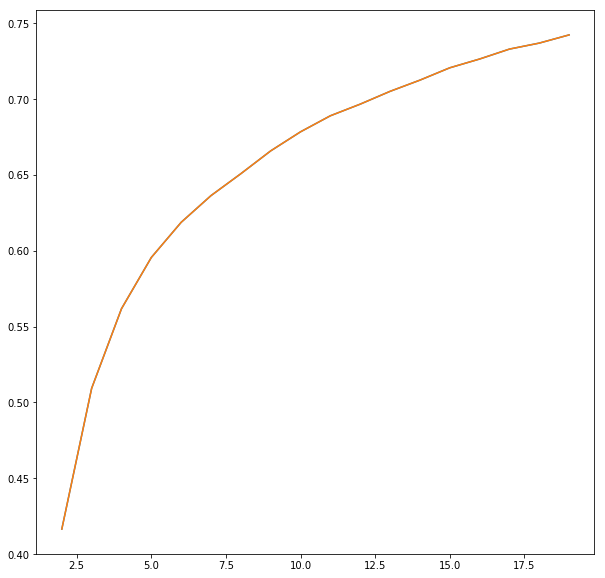

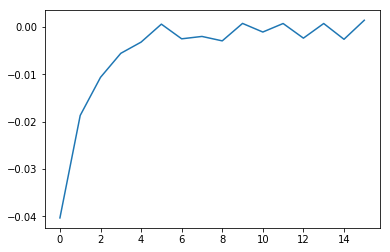

In [64]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(no_of_clusters,average)
#ax.scatter(width, height)
#ax.plot(229.499972,204.227352 , "or")
#ax.plot(48.982693,47.647092 , "or")
#ax.plot(16.474588,16.220802 , "ob")
plt.plot(no_of_clusters,average)
plt.figure()
#plt.plot(np.diff(np.diff(average)))
plt.show()

In [120]:
clusters = kmeans(data, 8)

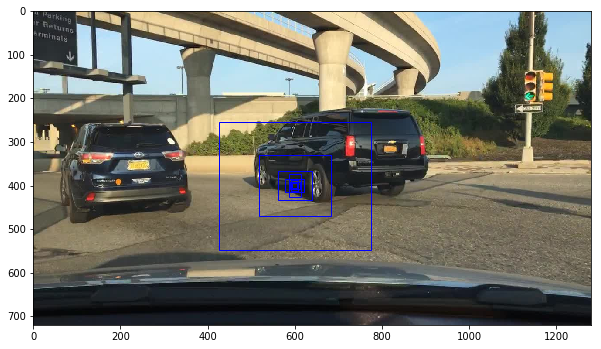

In [69]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im = np.array(Image.open('0000f77c-6257be58.jpg'), dtype=np.uint8)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
# Create figure and axes


# Display the image
ax.imshow(im)

for i in range(len(clusters)):
    
    #print(d[0]['labels'][i]['category'])
    
    w = clusters[i][0]
    h = clusters[i][1]
    
    rect = patches.Rectangle((600-w/2,400-h/2),w,h,linewidth=1,edgecolor='blue',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
#plt.savefig('foo.jpeg')
plt.show()